# Stationarity of a Time Series

In this notebook we will explore the concept of Stationarity using Tesla.

In [ ]:
import pandas as pd
#! pip install yfinance
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Lets import some data from Yahoo Finance.

In [ ]:
start = dt(2021,1,1)
end = dt(2022,1,1)

In [ ]:
tsla = yf.download('TSLA',start,end)[['Close']] # we just want the close price
tsla['Difference'] = tsla['Close'].diff() # close price differenced for later use

### Differencing

This can be simply explained by the formula below.

$$ X'_t = X_t - X_{t-1} $$



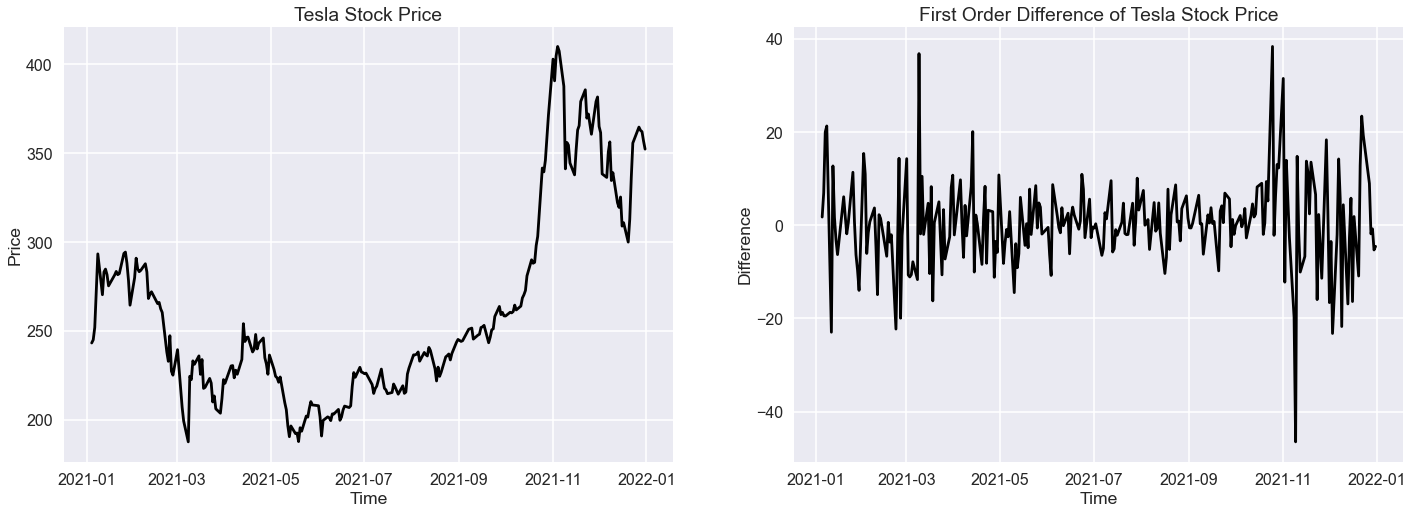

In [23]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (24,8))

plt.subplot(1,2,1) # we create a subplot 
plt.plot(tsla['Close'], 'k')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Tesla Stock Price')

plt.subplot(1,2,2)
plt.plot(tsla['Difference'],'k')
plt.xlabel('Time')
plt.ylabel('Difference')
plt.title('First Order Difference of Tesla Stock Price')

plt.savefig('Tesla Final 2.png',transparent = False, bbox_inches = 'tight',facecolor = 'w')


# Augmented Dickey Fuller 

It is not enough to just plot the price series next to the differenced series to make a judgement on stationarity.

In order to find out with certainty that a Time Series is stationary, we have to conduct Augmented Dickey Fuller (ADF).

The ADF test is a form of a **unit root** test, this test established whether a stochastic process is stationary or non-stationary.

If you would like to check out the math in more depth, you can do so [here](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test)

Our goal here is to test if the below regression cotains a **unit root**.

$$ Y_t = \alpha + \beta t + \rho Y_{t-1} + u_t $$

Where $\beta t $ is the time trend, $ \rho $ is the coefficient that defines the unit root, $ u_t $ is our error term.

If  $ \rho = 1$ this means the process contains a **unit root** so not stationary. If $\rho < 1 $ then our process is stationary.

We subtract $ Y_{t-1} $ from both sides of the equation. 

$$ \Delta Y_t = \alpha + \beta t + \theta Y_{t-1} + u_t $$

Now, testing $ \rho = 1 $  is equivalent to testing $ \theta = 0 $ where $\theta = (\rho - 1) $

The Null Hypothesis -> $ H_0: \theta = 0 $ the time series contains a unit root

The Alternative Hypothesis -> $H_1: \theta \neq 0 $ series is stationary.

What the **augmented** version of the above test does is including lags of the dependent variable, this is so that we do not find the presence of autocorrelation in our error terms which would mean that our model is somehow misspecified.

The augmented regression looks as such

$$ \Delta Y_t = \alpha + \beta t + \theta Y_{t-1} + \delta_1 \Delta Y_{t-1} + ... + \delta_{p-1} \Delta Y_{t-p+1} + u_t $$

This is called the **Augmented Dickey-Fuller Regression** the relating test is known as the **Augmented Dickey-Fuller Test**

The test has 3 different regression models that can be used to identify the order of integration of a series. Order of integration refers to the number of times we would have to difference the series to turn it into a stationary series. A series integrated of order 1 would mean a series needs to be differenced only once to become stationary.

**Model 1** : No Constant & No Time Trend

$$ \Delta Y_t =  \theta Y_{t-1} + \delta_1 \Delta Y_{t-1} + ... + \delta_{p-1} \Delta Y_{t-p+1} + u_t $$

**Model 2**: Constant & No Time Trend

$$ \Delta Y_t =  \beta t + \theta Y_{t-1} + \delta_1 \Delta Y_{t-1} + ... + \delta_{p-1} \Delta Y_{t-p+1} + u_t $$

**Model 3**: Constant & Time Trend

$$ \Delta Y_t = \alpha + \beta t + \theta Y_{t-1} + \delta_1 \Delta Y_{t-1} + ... + \delta_{p-1} \Delta Y_{t-p+1} + u_t $$

In the **adfuller** method below, you can specify which model you would like to run. You can also look at the documentation [here](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html) By default it will run the model with constant only. But play around with it and see what happens.

In [24]:
test_adf_tsla = adfuller(tsla['Difference'].dropna(),regression = 'c',autolag = 'AIC') 
print(f'Test Statistics: {test_adf_tsla[0]}')
print(f'p-value: {test_adf_tsla[1]}')
print(f'critical_values: {test_adf_tsla[4]}')

if test_adf_tsla[1] > 0.05:
    print("Not Stationary")
else:
    print("Stationary")

Test Statistics: -15.734130136207378
p-value: 1.278854820713741e-28
critical_values: {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544}
Stationary
